In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#결측치가 있는 변수를 표로 정리
# .isnull : NaN이 있는 위치를 True, 없는 위치를 False로 변환
# .sum() → True=1, False=0 이므로 컬럼별 결측치 개수를 계산
# .reset_index() → Series를 DataFrame 형태로 변환 (위 과정까지가 series형태로 출력되기 때문)
missing_df = train.isnull().sum().reset_index()
# 컬럼이름 변경 : index와 0으로 출력되는 표의 이름 변경
missing_df.columns = ['columns', '결측치']
# 결측치가 하나이상인 컬럼만 필터링
filtering_df = missing_df[missing_df['결측치']>0]
print(filtering_df)

# 30퍼이상의 결측치를 보유한 변수는 삭제
# 그 이하의 변수는 대체


         columns   결측치
3    LotFrontage   259
6          Alley  1369
25    MasVnrType   872
26    MasVnrArea     8
30      BsmtQual    37
31      BsmtCond    37
32  BsmtExposure    38
33  BsmtFinType1    37
35  BsmtFinType2    38
42    Electrical     1
57   FireplaceQu   690
58    GarageType    81
59   GarageYrBlt    81
60  GarageFinish    81
63    GarageQual    81
64    GarageCond    81
72        PoolQC  1453
73         Fence  1179
74   MiscFeature  1406


In [2]:
train.info()

print(train.shape[0], train.shape[1])
#1460 81

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
#결측치 30퍼센트 이상의 데이터 분류
filtering_df2 = missing_df[missing_df['결측치']>438]
print(filtering_df2)

#그 외의 결측치 데이터 분류
filtering_df3 = missing_df[(missing_df['결측치']<438) &(missing_df['결측치']>0)]
print(filtering_df3)

        columns   결측치
6         Alley  1369
25   MasVnrType   872
57  FireplaceQu   690
72       PoolQC  1453
73        Fence  1179
74  MiscFeature  1406
         columns  결측치
3    LotFrontage  259
26    MasVnrArea    8
30      BsmtQual   37
31      BsmtCond   37
32  BsmtExposure   38
33  BsmtFinType1   37
35  BsmtFinType2   38
42    Electrical    1
58    GarageType   81
59   GarageYrBlt   81
60  GarageFinish   81
63    GarageQual   81
64    GarageCond   81


In [4]:
#결측치가 30%이상인 값 438보다 많은 열 삭제
drop_trash = train.columns[train.isna().sum()>438]

tc = train.drop(columns=drop_trash)

print(tc)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0            Lvl    AllPub    Inside  ... 

In [5]:
#타겟은 sale price
tc.head()

tc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
#판다스의 get_dummies 함수 이용 범주형 변수를 원핫인코딩 .astype(int)는 true false를 숫자로 바꿈
tc = pd.get_dummies(tc)

#판다스의 fillna 함수를 이용 결측치를 평균값(.mean)으로 채움
tc = tc.fillna(tc.mean())

tc

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,False,True,False


OverallQual       0.790982
YearBuilt         0.522897
YearRemodAdd      0.507101
TotalBsmtSF       0.613581
1stFlrSF          0.605852
GrLivArea         0.708624
FullBath          0.560664
TotRmsAbvGrd      0.533723
GarageCars        0.640409
GarageArea        0.623431
SalePrice         1.000000
ExterQual_TA     -0.589044
BsmtQual_Ex       0.553105
KitchenQual_Ex    0.504094
KitchenQual_TA   -0.519298
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

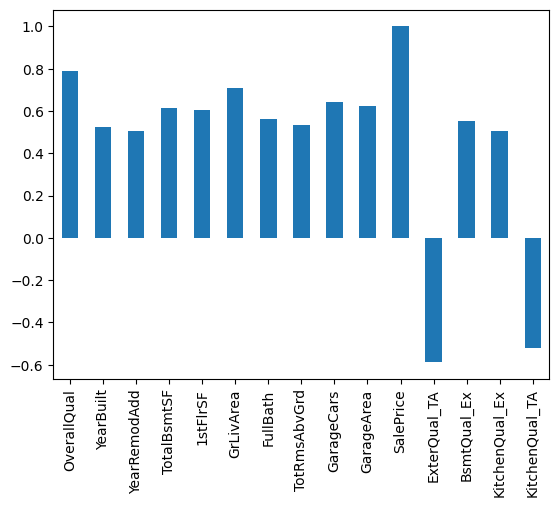

In [7]:
#SalePrice 기준 상관관계
cor=tc.corrwith(tc['SalePrice'])
#상관관계 절댓값이 큰 순으로 정렬
cor.abs().sort_values(ascending=False)
#상관관계 절대값이 0.5 이상인 특성만 분류
fcor = cor[abs(cor)>=0.5]
print(fcor)
#시각화
fcor.plot(kind='bar')
plt.show




count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

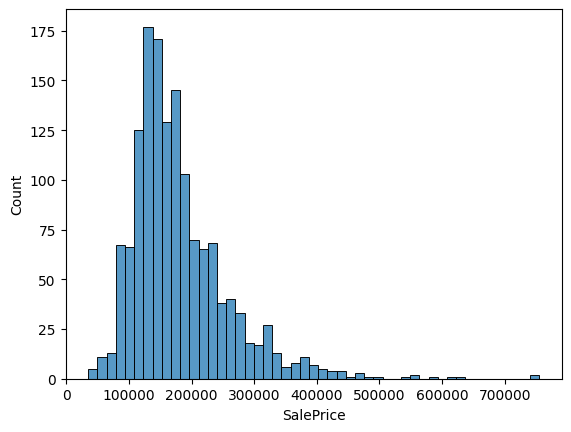

In [8]:
#타겟값의 분포 확인
sns.histplot(tc['SalePrice'])
tc['SalePrice'].describe()

In [9]:
#다중공선성 파악 -> statsmodels 라이브러리를 이용 pip 다운
import numpy as np
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#from statsmodels.tools.tools import add_constant


#여긴 잘 모르겠음
#vif_data = pd.DataFrame()
#vif_data['Features'] = tc.columns
#vif_data['VIF'] = [variance_inflation_factor(tc.values, i) for i in range(tc.shape[1])]

#print(vif_data)

In [10]:
#변수 간 상관관계 확인
tc.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,-0.051787,0.126580,-0.023461,-0.089928,-0.021846,-0.037020,-0.018090,0.015818,-0.072074,0.124842
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,0.016241,-0.037020,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011959,-0.014874,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,0.030002,-0.018090,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.009689,0.021369,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.000983,0.015818,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009914,0.000765,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,0.024359,-0.072074,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.084241,-0.019560,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


In [11]:
#학습데이터와 검증데이터 분할
X = tc.drop(['SalePrice'], axis=1)
y = tc['SalePrice']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [12]:
#LinearRegression 모델 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print(mean_squared_error(y_test, y_pred_lr))

#RMSE 구하기 -> MSE에 제곱근
def rmse(y_true, y_pred) :
    mse = mean_squared_error(y_true, y_pred)
    return np.sqrt(mse)

print(rmse(y_test, y_pred_lr))





884392100.1872485
29738.73064182882


In [13]:
#랜덤 포레스트 모델
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor()

rfr_model.fit(X_train, y_train)

y_pred_rfr = rfr_model.predict(X_test)

print(mean_squared_error(y_test, y_pred_rfr))
print(rmse(y_test, y_pred_rfr))


830634168.1783015
28820.72462965325


In [14]:
#XGBoost 모델 사용 pip install xgboost
import xgboost as xgb

xgb_model = xgb.XGBRegressor()

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print(mean_squared_error(y_test, y_pred_xgb))
print(rmse(y_test, y_pred_xgb))


725503616.0
26935.174326519587


              Model          RMSE
0  LinearRegression  29738.730642
1      RandomForest  28820.724630
2               XGB  26935.174327


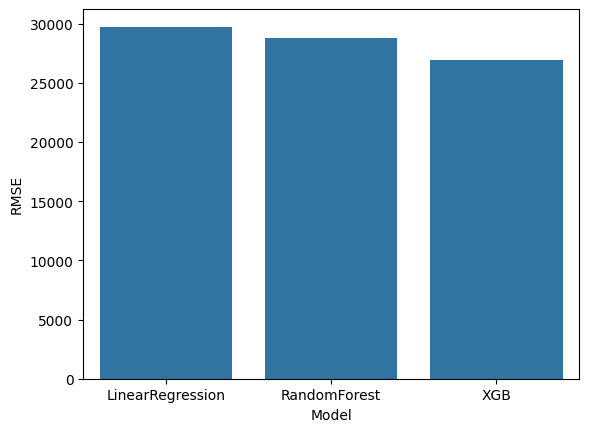

In [15]:
#각 모델의 RMSE 비교표, 시각화
a=rmse(y_test, y_pred_lr)
b=rmse(y_test, y_pred_rfr)
c=rmse(y_test, y_pred_xgb)

data = [['LinearRegression', a],['RandomForest',b],['XGB',c]]
df = pd.DataFrame(data, columns=['Model', 'RMSE'])
print(df)

sns.barplot(x=df['Model'], y=df['RMSE'])
plt.show()

In [16]:
#K폴드 교차검증
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle= True, random_state=42)

#xgboost 교차검증
scores_xgb = cross_val_score(xgb_model, X,y, cv=kf , scoring='neg_mean_squared_error' )

print(-scores_xgb.mean())
print(scores_xgb.std())


939286336.0
342214275.0537937


In [17]:
#랜덤 포레스트 모델 교차검증

scores_rfr = cross_val_score(rfr_model, X,y, cv=kf, scoring='neg_mean_squared_error' )

print(-scores_rfr.mean())
print(scores_rfr.std())

990011555.2874886
556471200.4351534


In [18]:
#LinearRegression 모델 교차검증
scores_lr = cross_val_score(lr_model, X,y, cv=kf, scoring='neg_mean_squared_error')

print(-scores_lr.mean())
print(scores_lr.std())

1281908291.1074233
916801128.5776637


In [19]:
#하이퍼 파라미터 튜닝 GridSearchCV 사용
from sklearn.model_selection import GridSearchCV
#하이퍼파라미터 그리드 정의
param_grid = { 'max_depth': [3,6,10],
              'learning_rate':[0.01, 0.1, 0.2],
              'n_estimators':[50,100,200]}
#객체 생성
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_xgb.fit(X_train, y_train)
#최적 모델로 예측
best_model_xgb = grid_search_xgb.best_estimator_
y_pred_xgb_best = best_model_xgb.predict(X_test)

#RMSE 계산
print(rmse(y_test, y_pred_xgb_best))


25456.285353523203


In [20]:
#건물 건축연도로 건물 나이 변수 만들기
tc['Age'] = 2025 - tc['YearBuilt']

tc



C:\Users\HKIT\AppData\Local\Temp\ipykernel_1124\712026896.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tc['Age'] = 2025 - tc['YearBuilt']


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,True,False,False,False,False,True,False,22
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,True,False,False,False,False,True,False,49
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,True,False,False,False,False,True,False,24
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,True,True,False,False,False,False,False,110
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,True,False,False,False,False,True,False,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,True,False,False,False,False,True,False,26
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,True,False,False,False,False,True,False,47
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,True,False,False,False,False,True,False,84
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,True,False,False,False,False,True,False,75
